# Customer Segmentation and K-Means

In this Notebook, I will show how to to apply customer segmentation on a customer dataset using sklearn. The customer will be partitioned into groups of individuals with similar characteristics.


In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

The first thing to do is to load the data from CSV File


In [2]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


Dropping the categorical variable Addresss

In [3]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


Normalizing using standardScaler()

In [4]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

Applying k-means on the dataset, and printing the cluster labels.

In [5]:
clusterNum = 4 #Number of clusters
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 1 0 2 3 0 0 0 2 1 0 2 2 2 2 2 2 2 0 2 2 2 2 0 1 0 2 2 0 2 1 0 2 2 2 2 2
 2 2 1 2 1 2 1 2 0 2 2 2 0 0 2 2 0 0 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 0 0 1 2
 2 2 0 2 1 0 0 0 1 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 1 0 0 2 0 2 2 0 0 0
 2 2 2 2 2 2 0 0 2 2 2 2 0 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 2 2 0 2 1 1 2 0 2 2 0 0 2 2 0 2 2 0 0 2 2 2 2 2 0 2 2 0 0 2 2 1 2
 2 2 2 2 0 2 2 0 2 0 2 2 0 3 2 1 2 2 2 2 0 2 3 1 2 2 0 0 0 2 2 0 0 0 0 2 1
 2 2 2 2 1 2 2 0 2 2 0 2 0 2 2 2 0 2 2 2 2 2 2 1 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 0 0 0 0 2 2 0 2 2 2 2 2 0 2 2 2 0 2 2 2 1 1 2 1 2 0 2 1 0 2 2 2 2 2 2
 2 2 2 0 0 0 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 2 2 0 2 1 2 2 0 2 2 1 0 0 1 2
 2 0 2 2 0 2 0 2 0 2 2 0 2 2 0 2 2 1 2 2 2 2 2 1 2 2 2 1 2 2 2 0 2 0 1 1 0
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 2 2 2 0 2 2 2 2 2 1 2 2 2 2 2 2 2 0 2
 0 1 2 2 0 2 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 2 2 0 2 2 2 0 2 2 2 0 0 0 2 2 3
 0 2 0 0 0 2 0 2 2 2 1 2 2 2 2 0 2 1 2 2 2 2 0 2 0 0 0 2 0 1 0 2 0 2 2 2 0
 2 0 2 2 2 2 1 2 2 2 0 2 

distribution of customers based and their relation with age and income

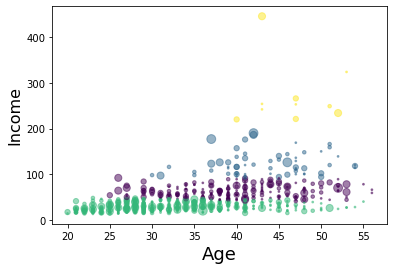

In [6]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

Thus, we have created four klusters where customers have similar caracteristics. In the Figure above, we can see that older individuals have more income. 

Reference:
https://cocl.us/DX0108EN_CC